## EE 242 Lab 2a – Convolution - Convolving and Smoothing

Ewan, Tyson, Sean

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [125]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 2a turn in checklist

•	Lab 2a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 1 -- Convolving Simple Signals

We will start by doing some simple convolutions similar to what you saw in class. Create a new cell in your Lab 2 notebook for Assignment 1. This assignment will have three parts, A-C.

**A.** Create the following three discrete-time signals, assuming a time range of [0,12].  
x = a box of height 1 starting at time n=2 and ending at n=8  
h1 = a pulse of length 4 & height 1 starting at time 0  
h2 = 1 at n=0, -1 at n=1, and 0 otherwise  

**B.**  Use numpy.convolve() function to find y1=$x*h1$ and y2=$x*h2$ (where $*$ indicates convolution, not multiplication).

**C.**  Create a time vectors nx, ny1 and ny2 for plotting x, y1 and y2. Use the stem plotting function to plot the signals on a 3x1 subplot, using a y-axis between -2 and 5 and a time axis from 0 to 20. Label and title the graphs. Verify that the signals for (y1) and (y2) match what you expect from your prelab. 

[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.1998e+01 1.1999e+01 1.2000e+01]
12001
12001
12001
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
24001
24001


<IPython.core.display.Javascript object>


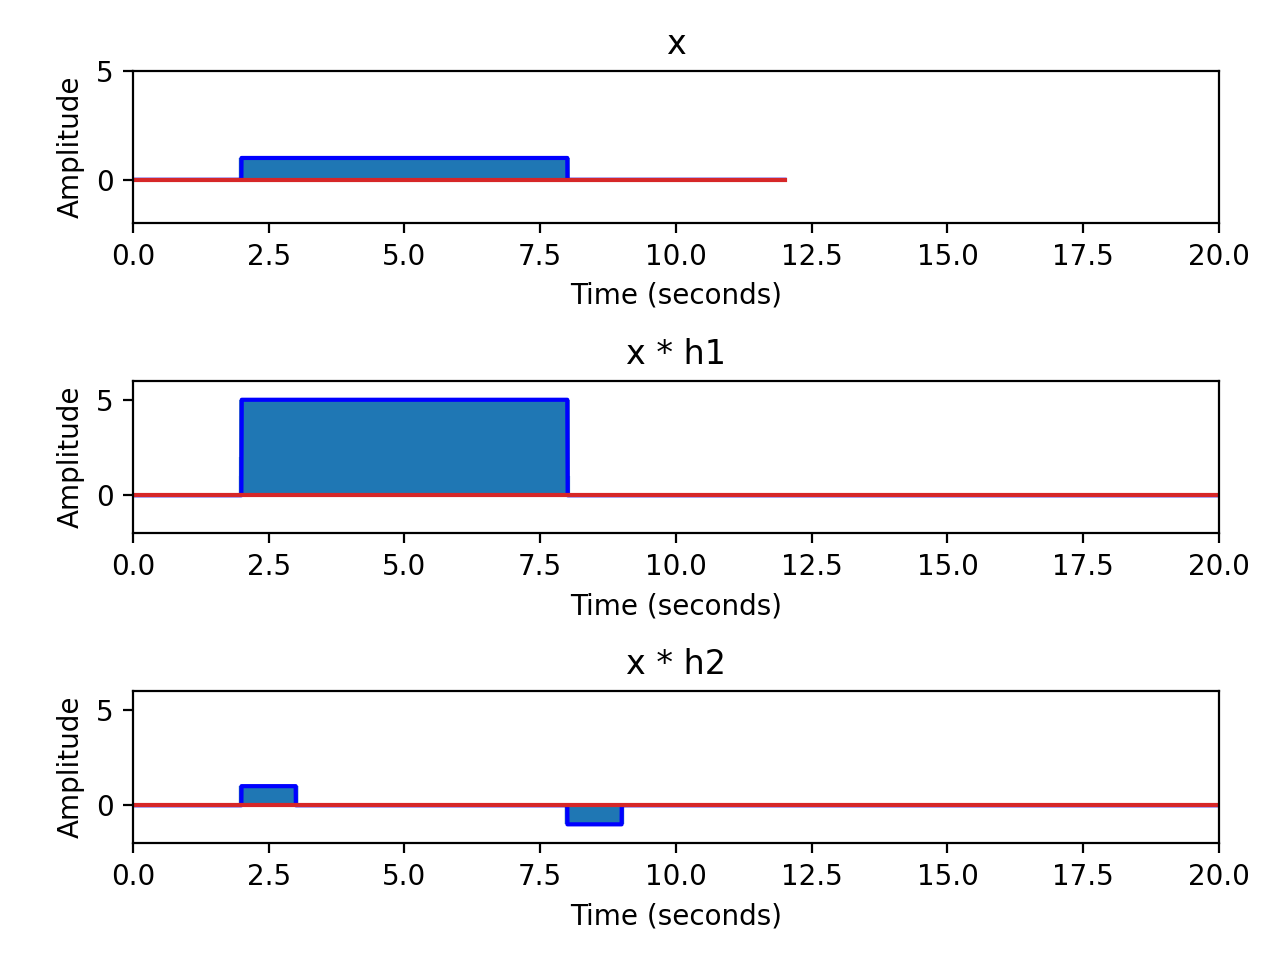

In [126]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise


t_duration = 12 # time in seconds
sr = 1000 # sample rate
t_range = np.linspace(0, t_duration, t_duration * sr + 1) # time in samples
print(t_range)
x = np.concatenate((np.zeros(2 * sr), np.ones(6 * sr + 1), np.zeros(4 * sr))) # pulse function
h1 = np.concatenate((np.ones(5), np.zeros(12 * sr - 4))) # smaller pulse function
h2 = np.concatenate((np.ones(1), np.zeros(sr - 1), -np.ones(1), np.zeros(11 * sr))) # delta function type

# checking that arrays are all correct size = t_duration * sr + 1
print(x.size)
print(h1.size)
print(h2.size)

print(x)
print(h1)
print(h2)

# TODO: Code that solves B
# Part B
# Find the responses y1=x*h1 and y2=x*h2
# TODO: Code that solves B

y1 = np.convolve(x, h1, mode = 'full')
y2 = np.convolve(x, h2, mode = 'full')


print(y1.size)
print(y2.size)

nx = t_range

#ny1 = np.linspace(0, 1, num=y1.size, dtype=float) <-- doesn't work
#ny2 = np.linspace(0, 1, num=y2.size, dtype=float)

ny1 = np.linspace(0, 2 * t_duration, 2 * (t_duration * sr) + 1)
ny2 = ny1

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C


# First graph of x
plt.subplot(3, 1, 1)
plt.stem(nx, x, linefmt = '-', markerfmt = 'b')
plt.title('x')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 20])
plt.ylim([-2,5])

# Second graph of h1
plt.subplot(3, 1, 2)
plt.stem(t_range1, y1, linefmt = '-', markerfmt = 'b')
plt.title('x * h1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 20])
plt.ylim([-2,6])

# Third graph of h2
plt.subplot(3, 1, 3)
plt.stem(t_range1, y2, linefmt = '-', markerfmt = 'b')
plt.title('x * h2')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 20])
plt.ylim([-2,6])
plt.tight_layout()


### Discussion

The systems corresponding to impulse responses $h_1$[n] and $h_2$[n] capture different information about a signal. Comment on what aspects of the input signal correspond to the largest values of $y_1$[n] and $y_2$[n].

The largest value of y1 is 5, and this is reflected by the maximum product of y1 and x. y1's pulse is 4 samples long, meaning that it contains 5 sample points is we start at 0. The signal x is also equal to 1 whenever it is non-zero. So, during convolution, whenever y1 is completely covered by a non-zero portion of x, it multiplies 1x1 5 times (and 0x1/0x0 for all other parts of y1), making the sum 1 + 1 + 1 + 1 + 1 = 5, for the duration that y1 is within the nonzero portion of x. The same applies for the signal y2, where the positive pulse only one sample wide passes through x during convolution, and reaches its maximum value of 1. The value then drops to 0 at the point that the negative pulse is also within the fram of x, and the value remains 0 until the positive y2 pulse passes out of x, and only the negative pulse is within--for a 1 second increment. So the max of 1 and min of 1 directly correspond to the 1 and -1 of y2. 

## Assignment 2 -- Smoothing Signals

In this assignment, we’ll implement a moving window smoothing function to show how you can use convolution to remove noise from a signal. We’ll use a discrete signal associated with a sampling period, and plot signals as if they were continuous to make it easier to see the effect of smoothing. The base signal is generated randomly, so you can run the cell multiple times to see how the results look for different signals.  This assignment will have three parts, A-C.

**A.**  Using the starter code provided, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals with 2x1 subplots, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. 

**B.**  Create a smoothed version of the signal called filtsig1 by computing the average value over a +/- k samples using the numpy.mean() function and k=20. You will need to make a decision as to how to handle the first and last k samples, for which there won’t be a full k samples available in both directions. In a single plot, plot the noisy signal and the filtered signal overlaid on the original signal.

**C.**  Define a vector hfilt that corresponds to box of length N=2k+1 and height 1/N. Create a second smoothed version of the signal called filtsig2 by convolving the base signal with hfilt using the numpy.convolve() function. Plot the two different filtered signal outputs overlaid on each other. Note that the convolve function will change the length, so you will need to define a new time vector for that. 



<IPython.core.display.Javascript object>


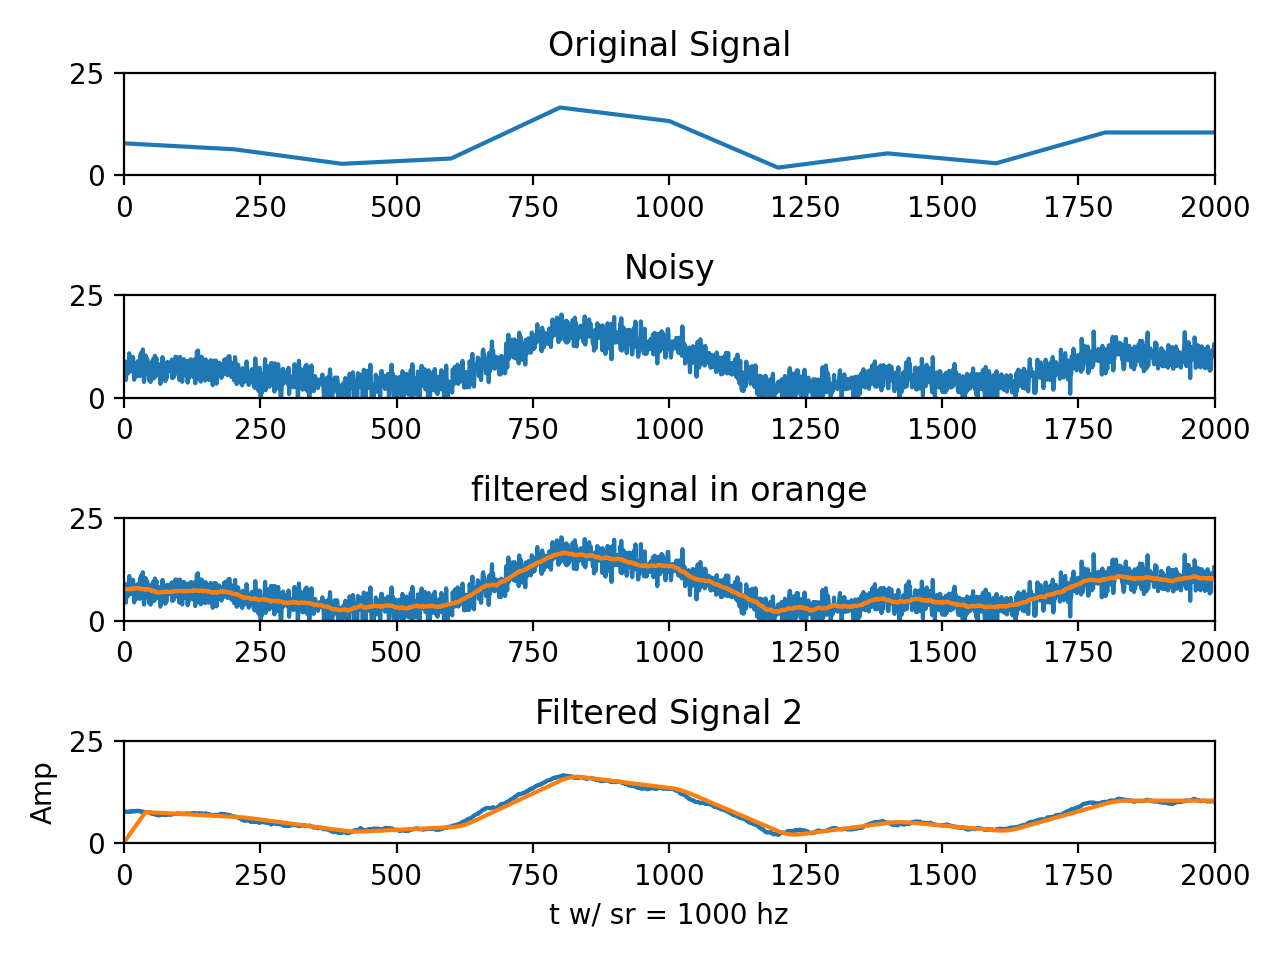

2040


Text(0, 0.5, 'Amp')

In [127]:
# Assignment 2 - Smoothing Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
# TODO: Code that solves the rest of A
noisy = np.add(noise, base)

x_ax = np.arange(0, 2000, 1,dtype=int)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_tight_layout(True)

ax1.set_title('Original Signal')
ax1.plot(x_ax, base)
ax1.set_xlim([0, 2000])
ax1.set_ylim([0,25])
                    
ax2.set_title('Noisy')
ax2.plot(x_ax, noisy)
ax2.set_xlim([0, 2000])
ax2.set_ylim([0,25])

# Part B
# implement the running mean filter with a for loop
# TODO: Code that solves B

filtsig1 = np.arange(0, 2000, 1, dtype=float)

k = 20
for i, val in enumerate(noisy):
    if k > i:
        filtsig1[i] = np.mean(noisy[0:i+k])
    elif i + k > 2000:
        filtsig1[i] = np.mean(noisy[i-k:])
    else:
        filtsig1[i] = np.mean(noisy[i-k:i+k])

ax3.set_title('filtered signal in orange')
ax3.plot(x_ax, noisy)
ax3.plot(x_ax, filtsig1)
ax3.set_xlim(0, 2000)
ax3.set_ylim(0, 25)


# Part C
# implement smoothing using convolution
# TODO: Code that solves C

N = 2 * k + 1
hfilt = np.ones(N) * (1 / N)
filtsig2 = np.convolve(base, hfilt, mode = 'full')
print(filtsig2.size)
x_axis2 = np.arange(0, filtsig2.size, 1, dtype=int)


ax4.set_title('filtered signal 2 in orange')
ax4.plot(x_ax, filtsig1)
ax4.plot(x_axis2, filtsig2)
plt.xlim([0, 2000])
plt.ylim([0, 25])
plt.title('Filtered Signal 2')
plt.xlabel('t w/ sr = 1000 hz')
plt.ylabel('Amp')

###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k.

The filtered signal obtained through convolution is much sharper and maintains the almost digital nature of the original base signal, whereas the filter obtained using the averaging window leaves the signal more bumpy in contrast to the base signal. This is due to the fast that convolution instead filters the noise by filling in the gaps it creates, whereas the averaging function decreases the magnitude of the gaps as much as it can, but on average there will still be some standard deviation, and thus the average noise is never diminished to 0. If we were to amplify the noise, that would increase the bumpiness of both filtered signals. Decreasing k would increase the presence of noise in the filtered signal, and increasing k would diminish it, but overall the signal would be distorted in comparison to the original.